In [1]:
from scipy.integrate import solve_ivp
import numpy as np

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

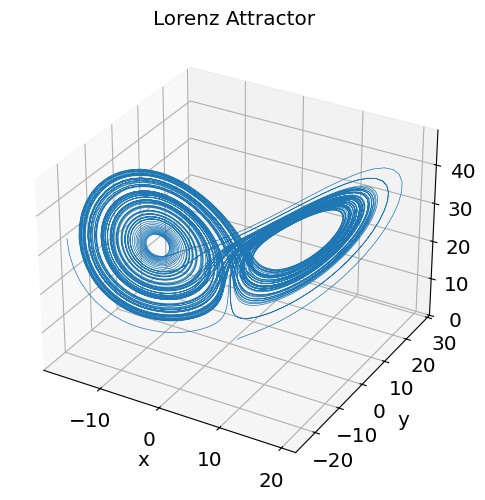

In [15]:
# ローレンツ方程式 dy/dt = f(t, y) の右辺の関数 f
def lorenz(t, y_of_t, sigma, beta, rho):
    x, y, z = y_of_t
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# パラメータの設定
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# 初期条件
initial_state = np.array([1.0, 1.0, 1.0])

# 時間の範囲
t_start = 0.0
t_end = 100.0
time_points = np.linspace(t_start, t_end, 10000)  # y(t) を見積もるtの点

# ODEを解く
solution = solve_ivp(
    lorenz, # 微分方程式の右辺の関数 f(t,y)
    [t_start, t_end], # tの初期値と終端値
    initial_state, # t=t0でのy(t)の初期値
    args=(sigma, beta, rho), # tとy以外に関数fに現れるパラメタ
    t_eval=time_points # y(t) を見積もる t の点
)

# 結果を3Dプロットする
x, y, z = solution.y
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz Attractor")
plt.show()